In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

### Load dataset

In [54]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x, y), (_, _) = mnist.load_data()  # Load ONLY TRAINING data

# Split the data into training and testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42) #random_state makes the split consistent.

# Printing shapes to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (48000, 28, 28)
y_train shape: (48000,)
x_test shape: (12000, 28, 28)
y_test shape: (12000,)


### Visualize data

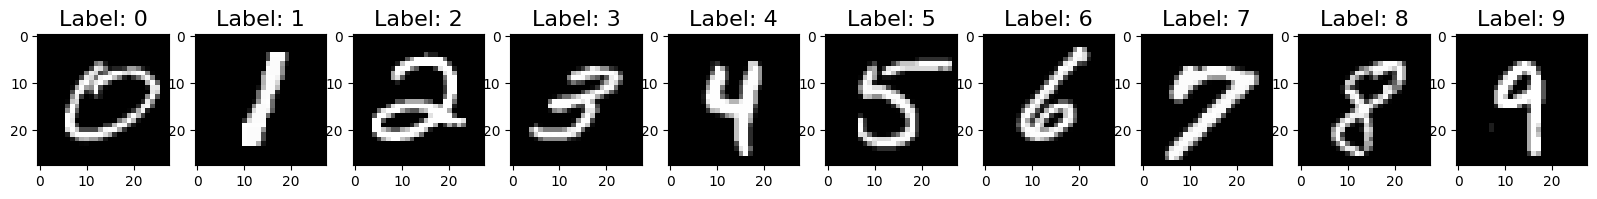

In [55]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [56]:
for i in range(10):
  print(y_train[i])

5
0
1
6
1
3
8
8
1
8


### Prepare data

In [57]:
# one-hot vector encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [58]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [59]:
# Normalize data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [60]:
#Before reshaping
x_train[0].shape

(28, 28)

In [61]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [62]:
# After reshaping
x_train.shape

(48000, 784)

### Create model- Neural Network

In [63]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_shape=(784,)))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [64]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6471 - loss: 1.1572
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9233 - loss: 0.2653
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9456 - loss: 0.1908
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9526 - loss: 0.1568
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9627 - loss: 0.1272
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9690 - loss: 0.1091
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9746 - loss: 0.0885
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9762 - loss: 0.0821
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9788 - loss: 0.0716
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9808 - loss: 0.0612


### Evaluate Model performance (with training data)

In [65]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0861
Test Loss: 0.08700969070196152
Test Accuracy: 0.9749166369438171


In [66]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[1.0584378e-07 1.3863554e-07 1.5282406e-07 ... 9.9998540e-01
  3.9695209e-08 1.1524692e-05]
 [5.5792250e-12 1.0598698e-08 5.7376259e-09 ... 8.9722804e-12
  1.5165068e-07 8.5956287e-07]
 [2.5147931e-06 1.9320009e-07 1.9587702e-07 ... 1.0254407e-08
  9.9992472e-01 1.0282048e-05]
 ...
 [1.4504033e-05 4.3870376e-05 4.6412351e-06 ... 5.3216901e-04
  9.0424088e-05 9.6372598e-01]
 [9.5458025e-05 6.8575031e-07 2.6762916e-07 ... 9.9217874e-01
  2.5487449e-07 7.5959815e-03]
 [3.3970457e-06 2.2911972e-05 9.9987531e-01 ... 4.0677792e-06
  2.8288787e-05 2.7909753e-06]]
[7 3 8 ... 9 7 2]


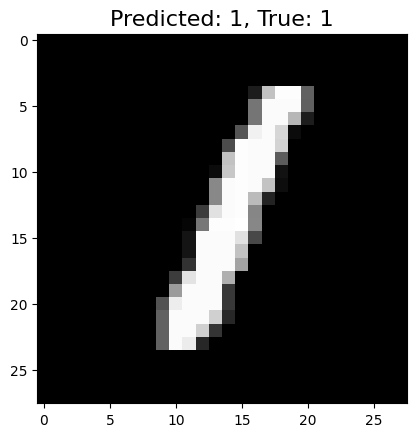

In [67]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true),
          fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

### Testing with external sample image

In [68]:
from PIL import Image

def preprocess_image(image_path):
    """Loads, preprocesses, and returns an image as a NumPy array (flattened)."""
    img = Image.open(image_path).convert('L')  # Load as grayscale
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = img_array.reshape(1, 784)  # Flatten and add batch dimension
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


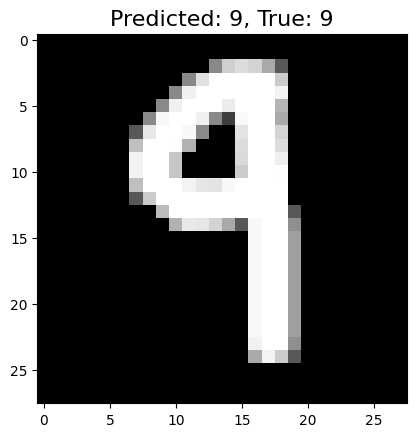

In [69]:
# External Example
image_path = "externalSample_9.png"
input_image = preprocess_image(image_path)

prediction = model.predict(input_image)
true_label = 9
predicted_label = np.argmax(prediction)

plt.title('Predicted: {}, True: {}'.format(predicted_label, true_label),
          fontsize=16)
plt.imshow(input_image.reshape(28,28), cmap='gray')

### Loading actual test data form dataset

In [70]:
# Load the MNIST dataset
(_, _), (X_test, Y_test) = mnist.load_data()

# Preprocess the test data
X_test_flattened = X_test.reshape(X_test.shape[0], 28 * 28) / 255.0
# one-hot vector encoding
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [71]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_flattened, Y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0930
Test Loss: 0.0827
Test Accuracy: 0.9738


In [72]:
y_pred = model.predict(X_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1.2667481e-06 4.1691951e-06 5.2943178e-05 ... 9.9984193e-01
  1.0040409e-05 8.6232158e-06]
 [3.1829401e-08 7.5064287e-05 9.9989039e-01 ... 2.7937174e-08
  1.4727805e-05 5.3668359e-10]
 [2.7289583e-05 9.8436594e-01 1.4584220e-03 ... 6.5480354e-03
  5.1100580e-03 6.6055560e-05]
 ...
 [2.9718150e-09 1.5417257e-08 3.9050958e-09 ... 7.2157763e-06
  3.8546877e-06 2.3757048e-05]
 [1.5421369e-06 1.4913890e-07 2.4472555e-09 ... 4.1245934e-07
  8.8201335e-04 1.9438063e-07]
 [4.5760206e-08 5.1284414e-11 1.9948978e-09 ... 9.3020439e-11
  1.7778989e-10 3.8110574e-13]]
[7 2 1 ... 4 5 6]


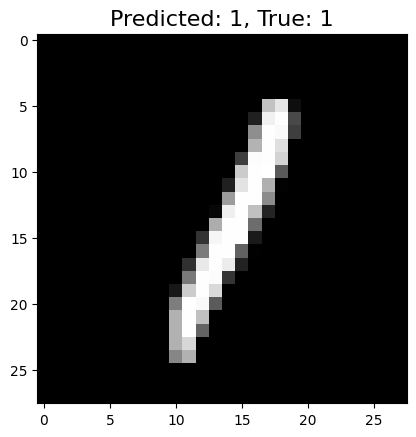

In [73]:
# Single Example
random_idx = np.random.choice(len(X_test_flattened))
x_sample = X_test_flattened[random_idx]
y_true = np.argmax(Y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true),
          fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


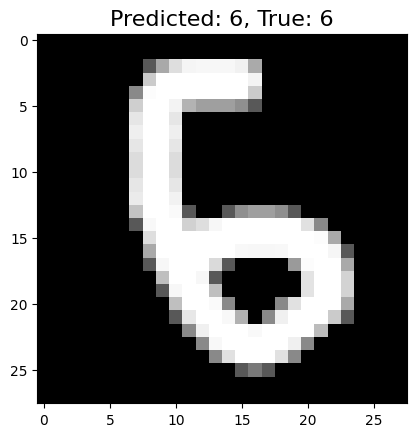

In [80]:
# External Example
image_path = "externalSample_6.png"
input_image = preprocess_image(image_path) # Defined while previously testing with external image

prediction = model.predict(input_image)
true_label = 6
predicted_label = np.argmax(prediction)

plt.title('Predicted: {}, True: {}'.format(predicted_label, true_label),
          fontsize=16)
plt.imshow(input_image.reshape(28,28), cmap='gray')

### Confusion Matrix
Most digits are classified with high accuracy (large numbers on the diagonal)
Some minor confusion exists between visually similar digits

Like 3, 5, and 8 which can look structurally similar
Or 4 and 9 which might have comparable shapes

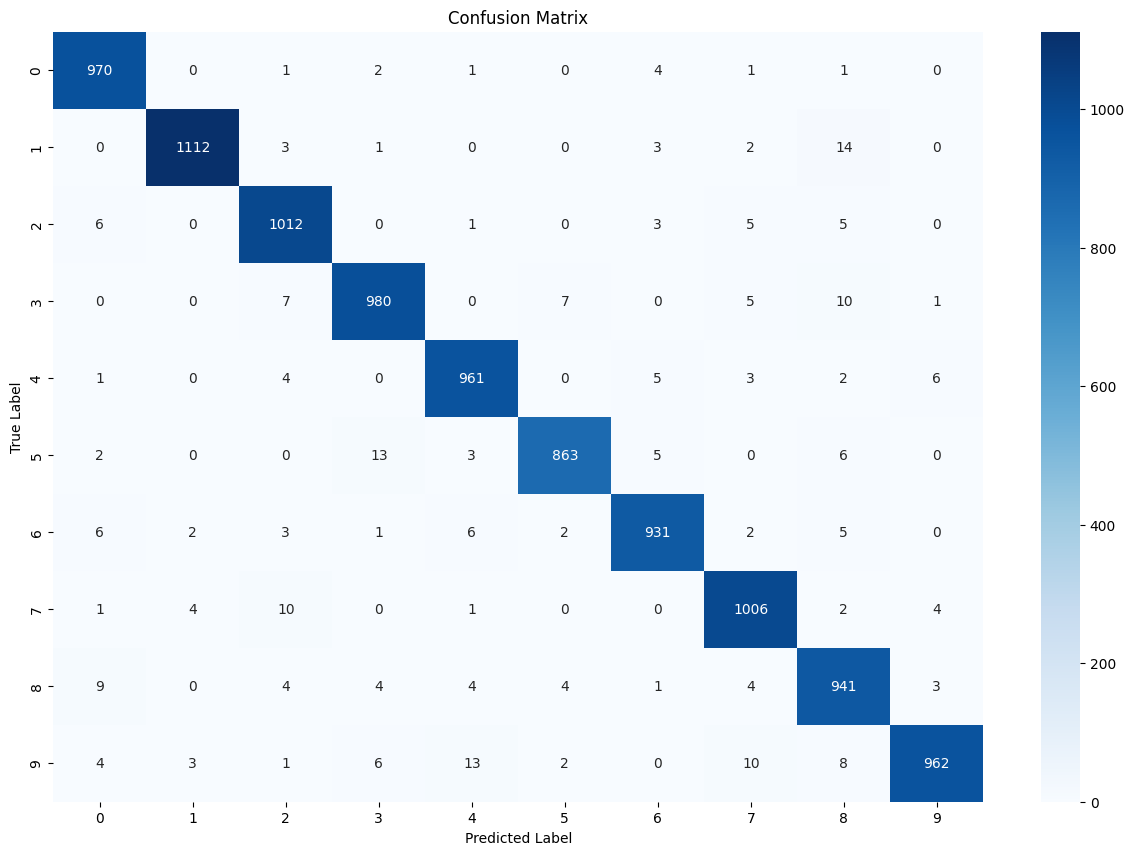

In [75]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

### Investigate errors

In [77]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = X_test_flattened[errors]

In [78]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # Last 5 ones

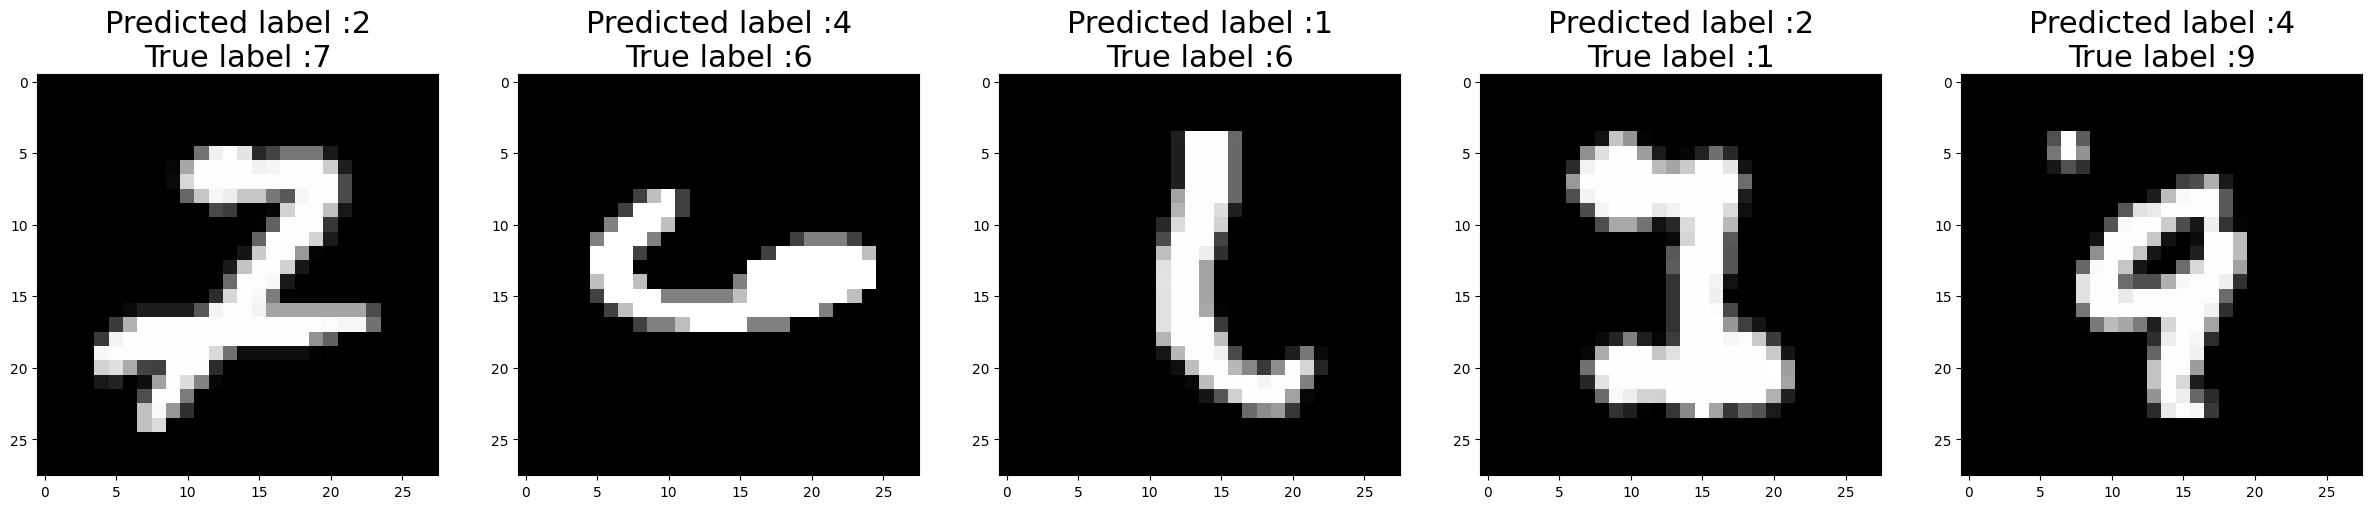

In [79]:
# Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Predicted label :{}\nTrue label :{}'.format(y_p, y_t), fontsize=22)